In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from denovo_utils.analysis.visualization import plot_spectrum
from spectrum_utils import plot as sup
from glob import glob

2024-08-13 14:22:46.975885: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 14:22:46.975925: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 14:22:46.975936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Modification already exists in ModificationsDB. Skipping.


In [5]:
sorted(filenames)

['F01_Fraction1',
 'F01_Fraction2',
 'F01_Fraction3',
 'F01_Fraction4',
 'F06',
 'F07_Fraction1',
 'F07_Fraction2',
 'F07_Fraction3',
 'F07_Fraction4',
 'F08_Rep1',
 'F08_Rep2',
 'F08_Rep3',
 'S03',
 'S07',
 'S11_Fraction1',
 'S11_Fraction2',
 'S11_Fraction3',
 'S11_Fraction4',
 'S14_Rep1',
 'S14_Rep2',
 'S14_Rep3']

/tmp/ipykernel_86904/4030725570.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15,4))


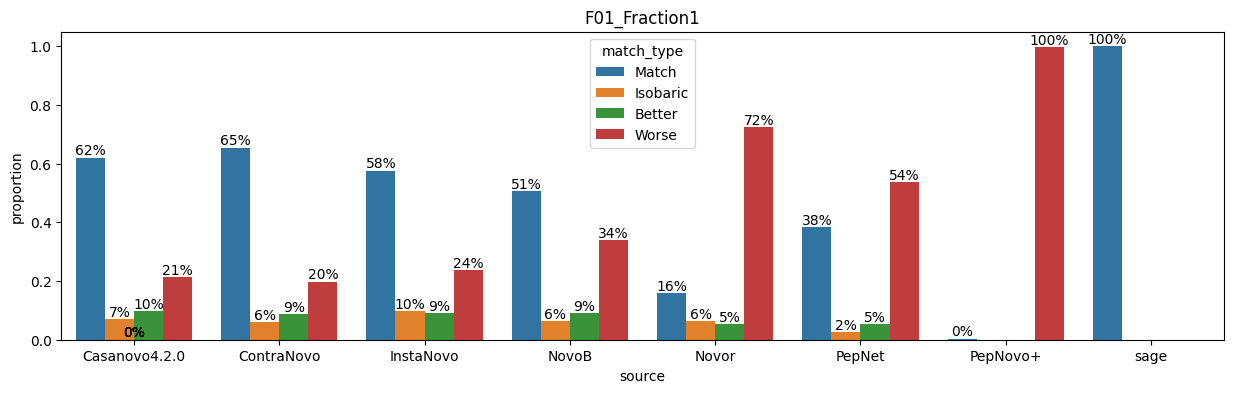

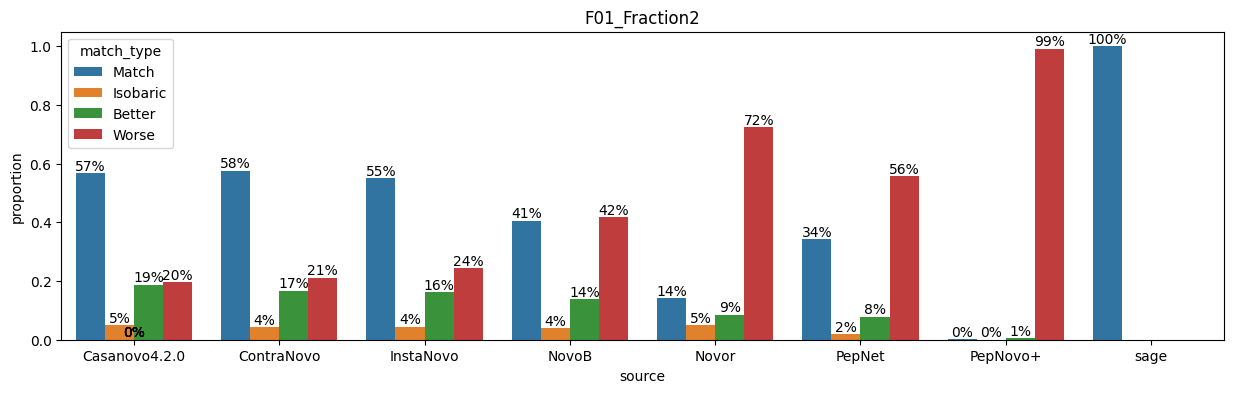

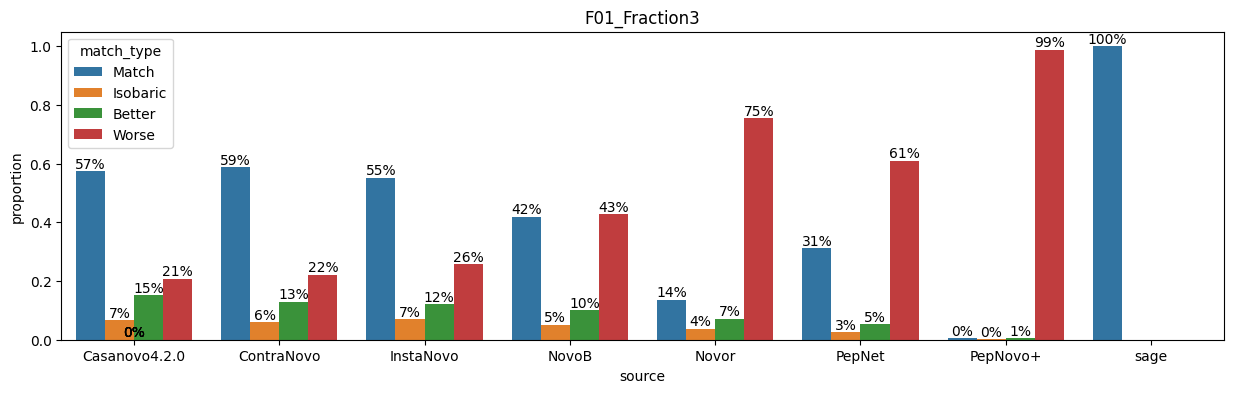

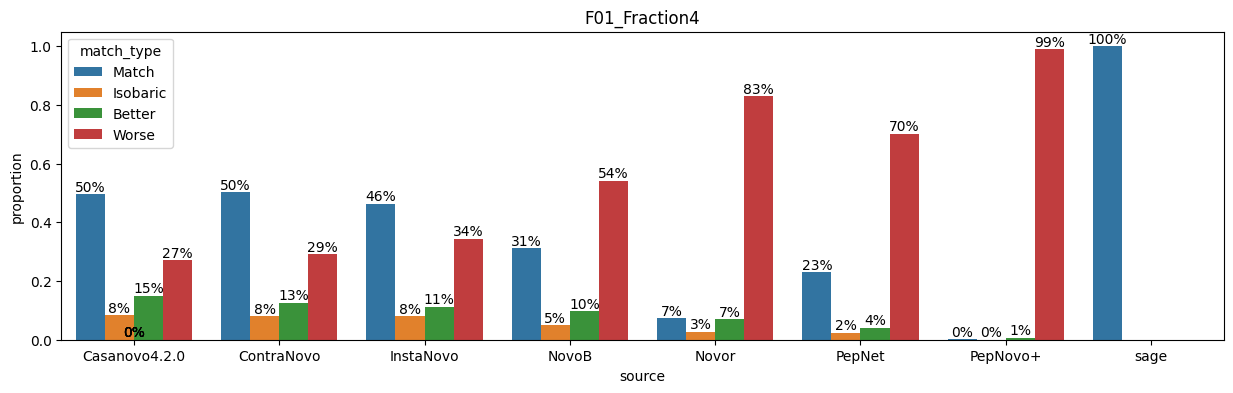

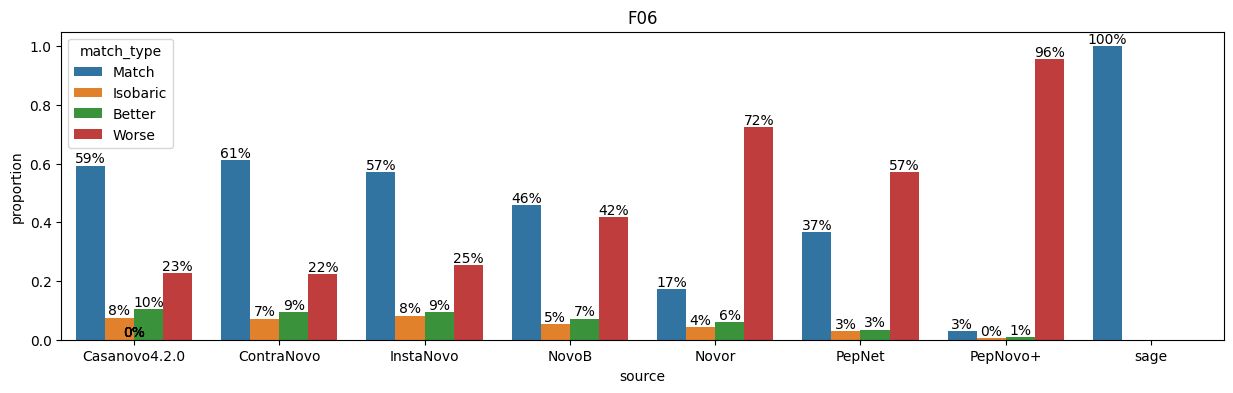

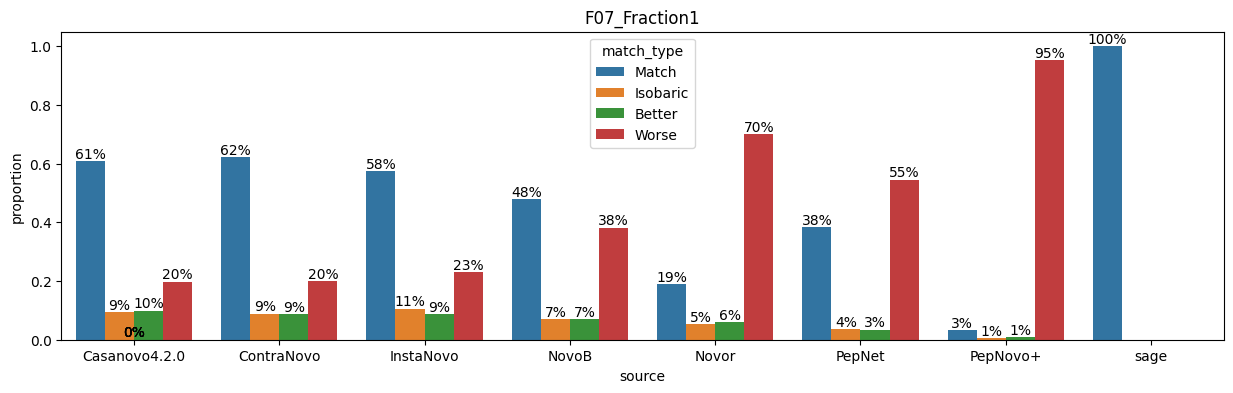

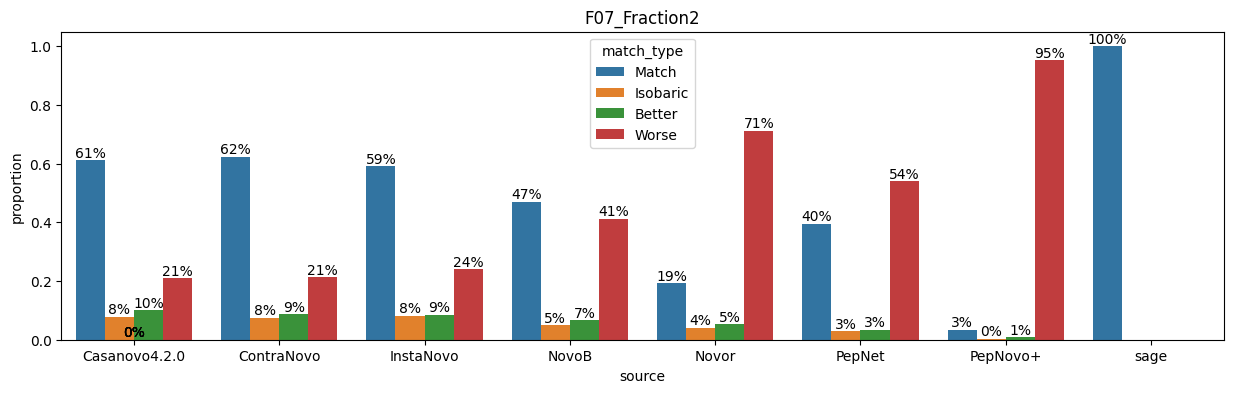

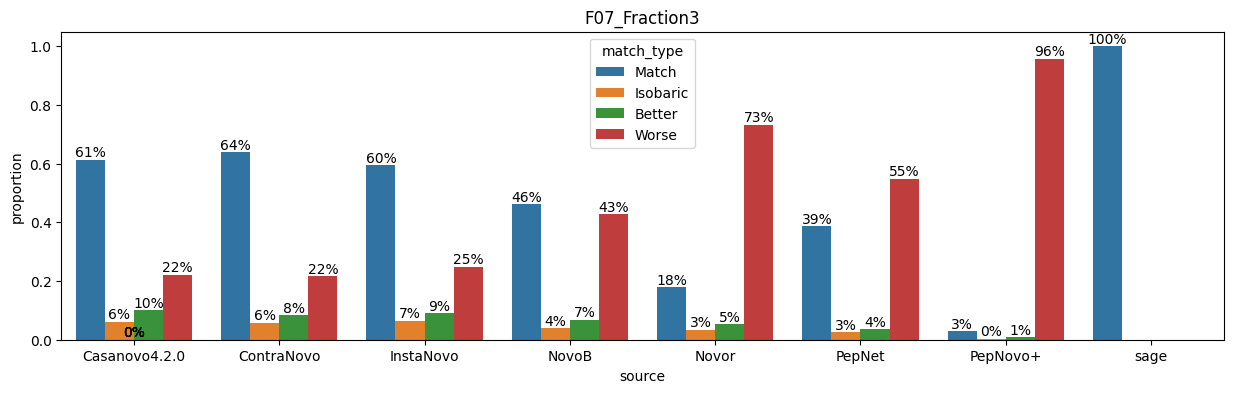

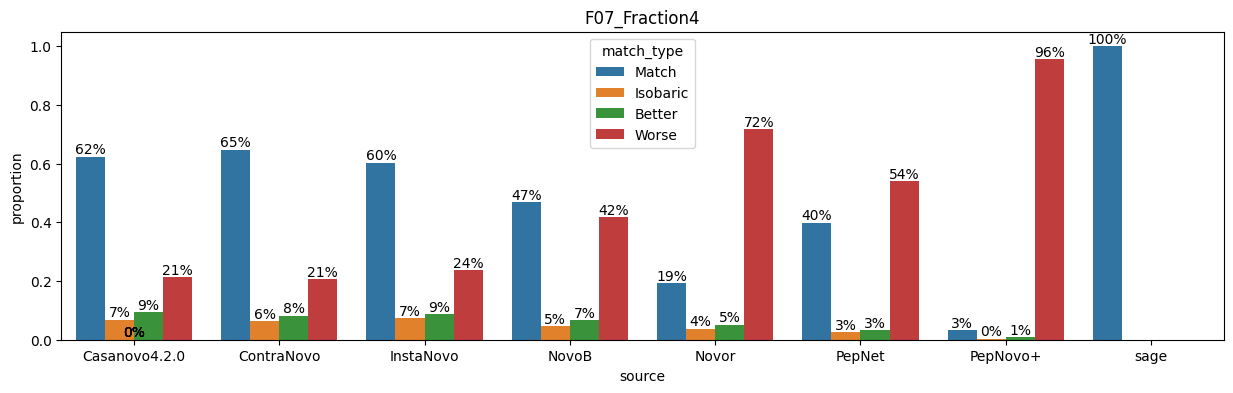

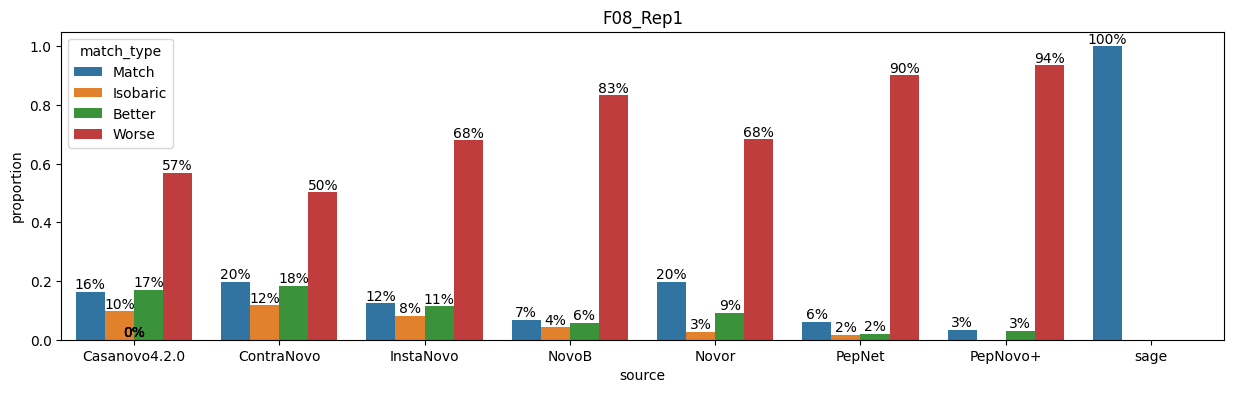

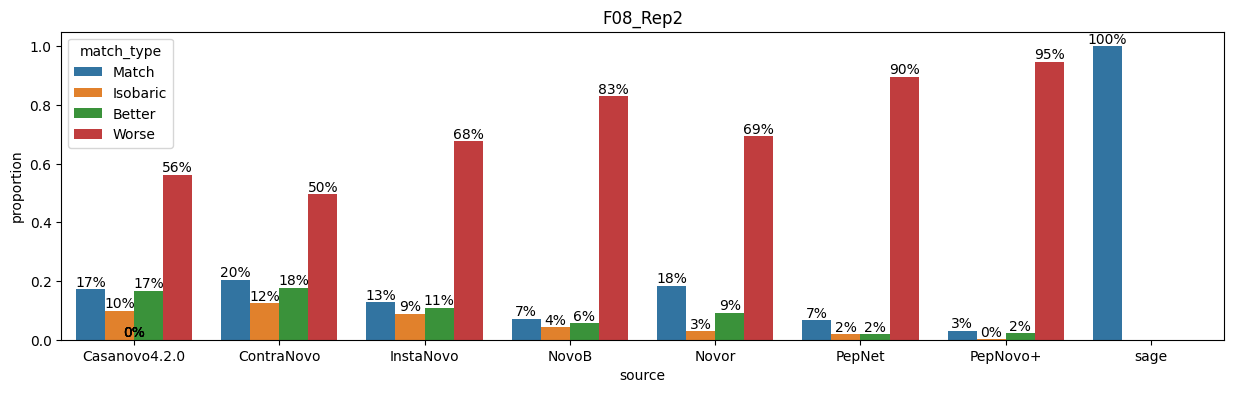

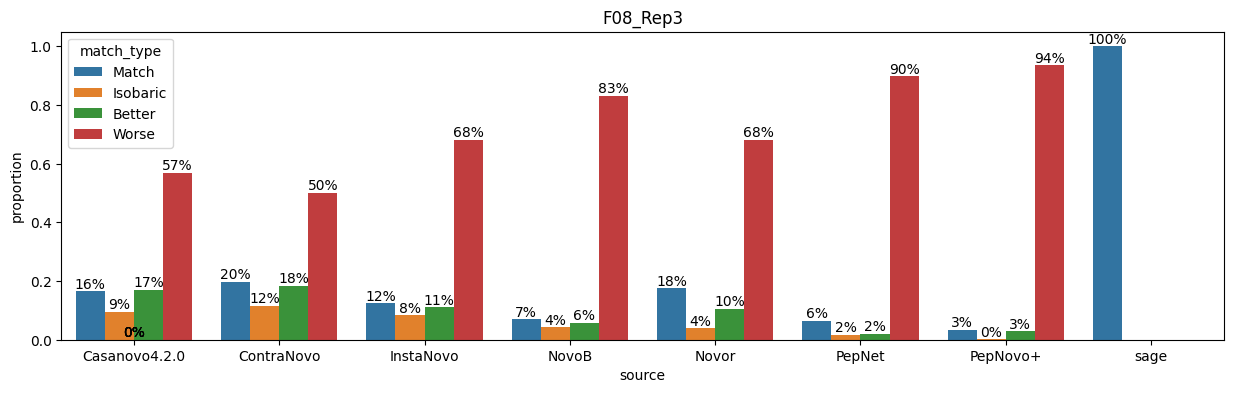

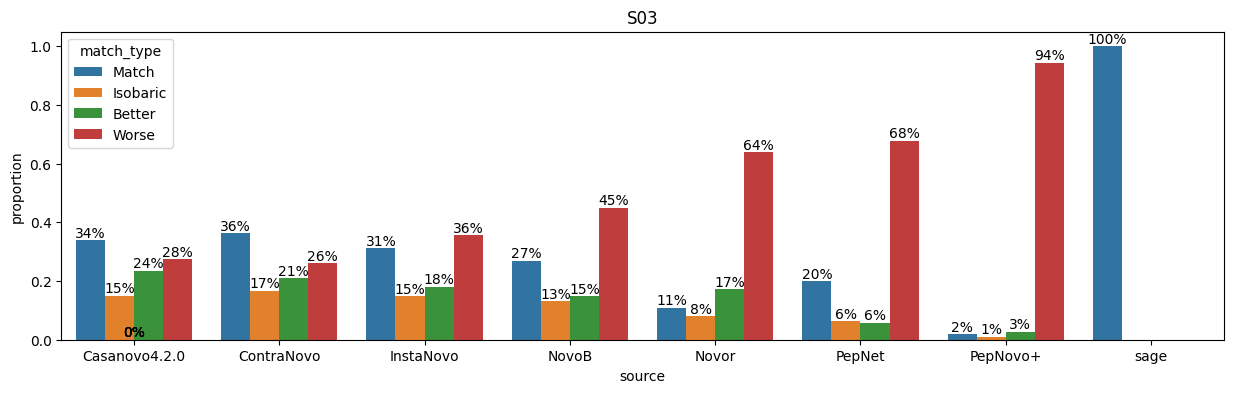

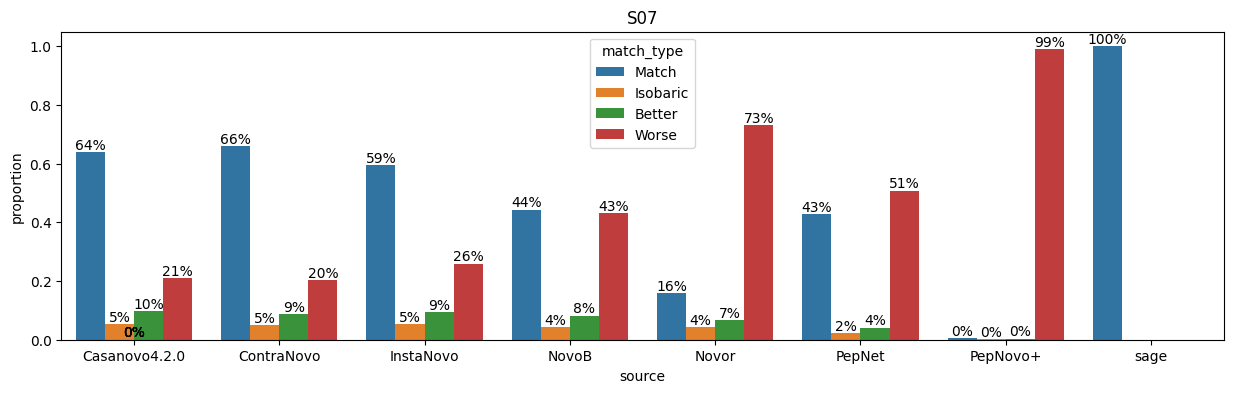

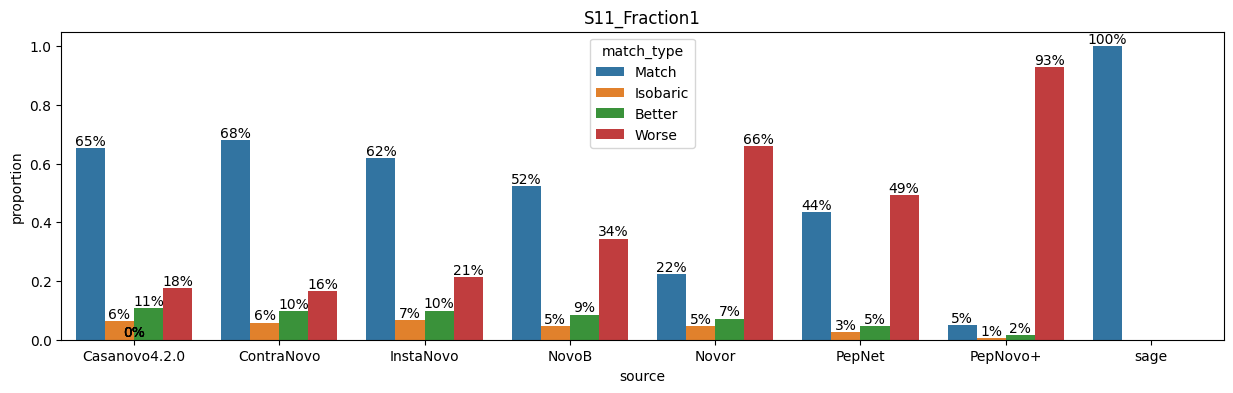

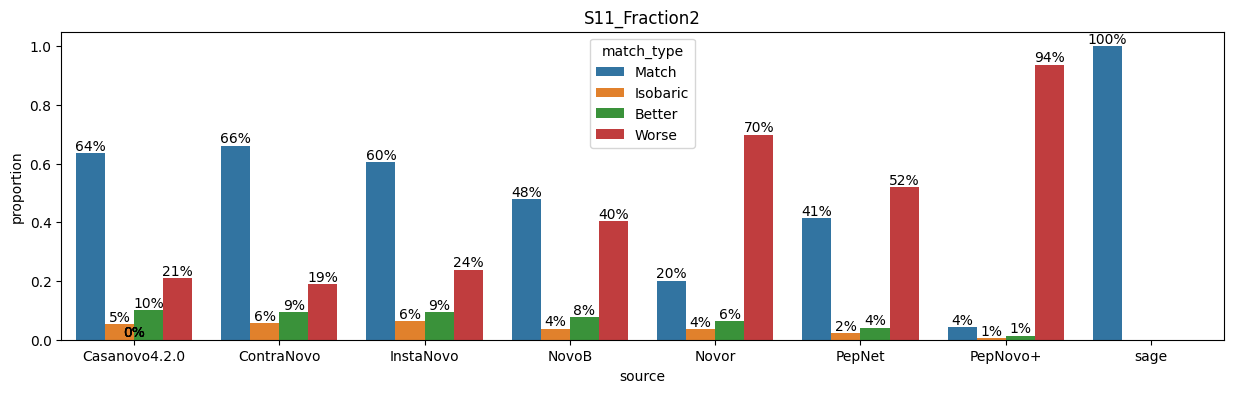

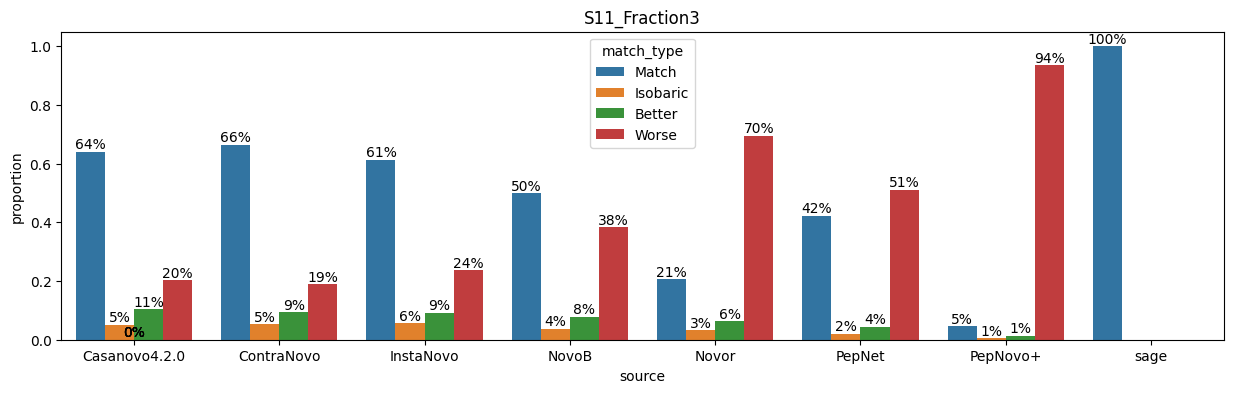

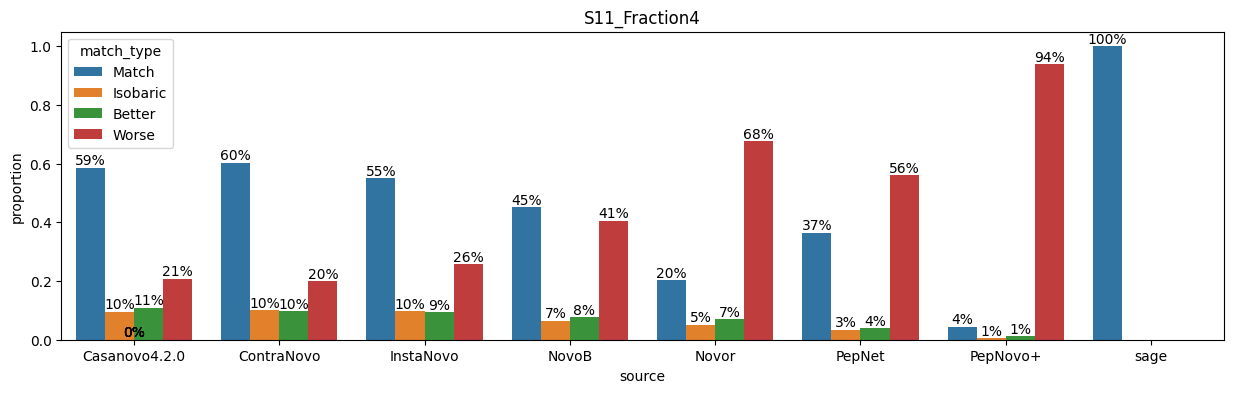

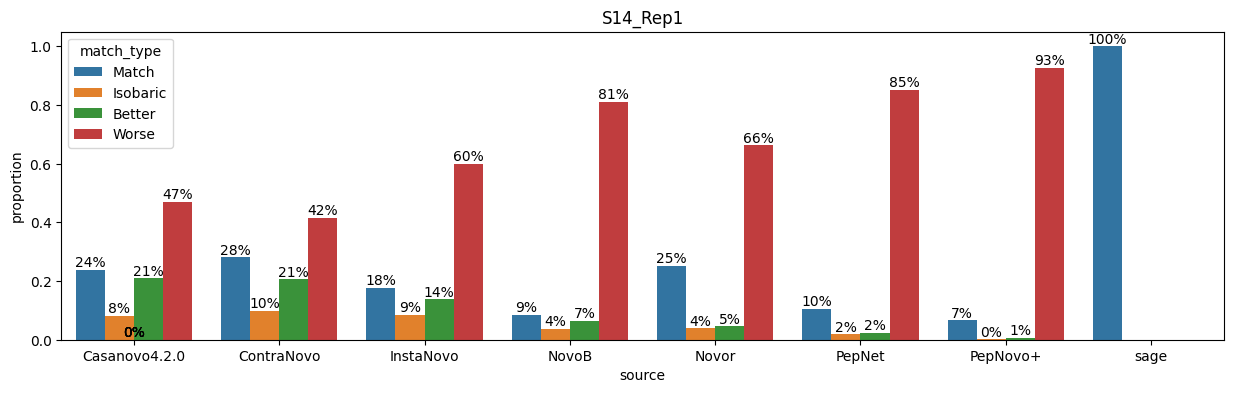

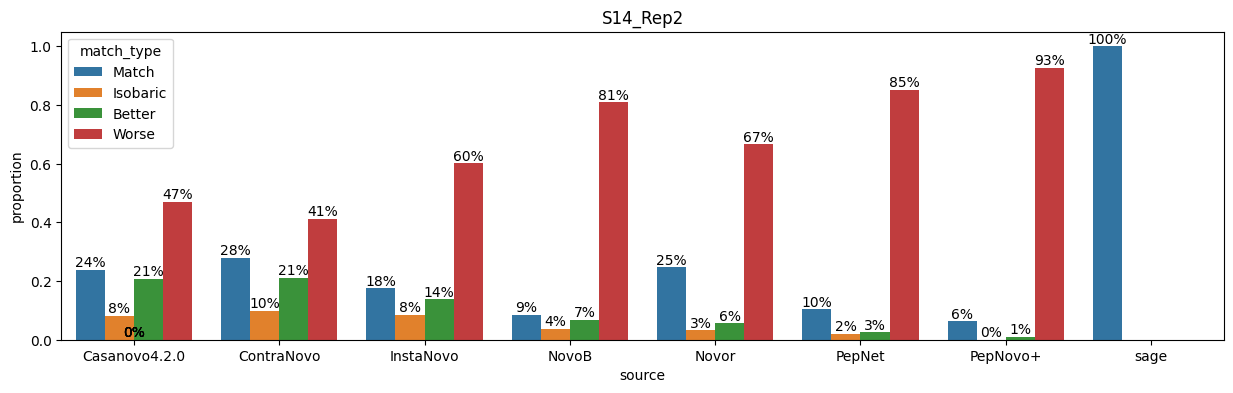

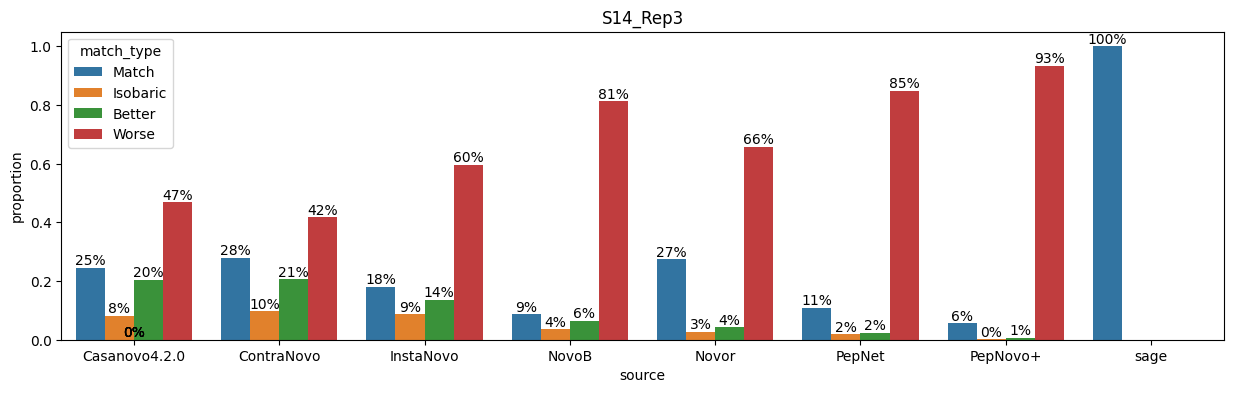

In [6]:
filenames = sorted([
    x.split("/")[-1].split(".")[0] for x in glob("/home/samva/Doctorate/DeNovo_Benchmark/notebooks/analysis/filtered_results/*.pkl")
])

for filename in filenames:

    df = pd.read_pickle(f"/home/samva/Doctorate/DeNovo_Benchmark/notebooks/analysis/filtered_results/{filename}.pkl")
    mgf_path = f"/home/samva/Doctorate/data_directory/denovo_project/mgf_filtered/{filename}.mgf"

    fig, ax = plt.subplots(1, 1, figsize=(15,4))
    ax.set_title(filename)
    sns.barplot(
        df.groupby("source").match_type.value_counts(normalize=True).reset_index(),
        x="source",
        hue="match_type",
        y="proportion",
        hue_order=["Match", "Isobaric", "Better", "Worse"],
        ax=ax
    )

    # Annotate the bars
    for p in ax.patches:
        height = p.get_height()  # Get the height of each bar
        ax.annotate(f'{height:.0%}',  # Format as percentage with two decimal places
                    (p.get_x() + p.get_width() / 2., height),  # Position the text in the center of the bar
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),  # Slightly offset the text above the bar
                    textcoords='offset points')

    

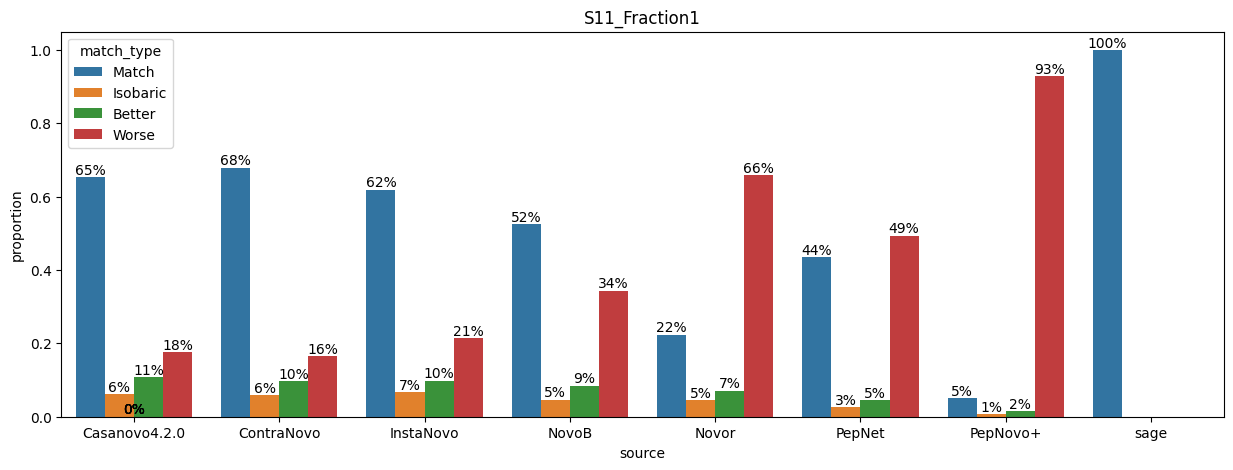

In [52]:
plt.figure(figsize=(15,5))
ax= sns.barplot(
    df.groupby("source").match_type.value_counts(normalize=True).reset_index(),
    x="source",
    hue="match_type",
    y="proportion",
    hue_order=["Match", "Isobaric", "Better", "Worse"]
)

# Annotate the bars
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height:.0%}',  # Format as percentage with two decimal places
                (p.get_x() + p.get_width() / 2., height),  # Position the text in the center of the bar
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),  # Slightly offset the text above the bar
                textcoords='offset points')
plt.title(filename)
plt.show()

In [11]:
worse_casanovo = df.loc[
    (df.source.isin(["sage", "Casanovo4.2.0"])) &
    (df.match_type=="Worse"), 
    ["spectrum_id", "peptide", "score", "hyperscore", "hyperscore_diff"]].groupby("spectrum_id").apply(lambda x: x.to_dict("list")).reset_index().rename(columns={0:"d"})

/tmp/ipykernel_34813/257187420.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ["spectrum_id", "peptide", "score", "hyperscore", "hyperscore_diff"]].groupby("spectrum_id").apply(lambda x: x.to_dict("list")).reset_index().rename(columns={0:"d"})


In [12]:
worse_casanovo_df = pd.DataFrame([{k: v[0] for k, v in d.items()} for d in worse_casanovo["d"].tolist()])

In [13]:
ground_truth_peptide = df.loc[df.source=="sage", ["spectrum_id", "peptide"]].set_index("spectrum_id").to_dict()["peptide"]
ground_truth_hyperscore = df.loc[df.source=="sage", ["spectrum_id", "hyperscore"]].set_index("spectrum_id").to_dict()["hyperscore"]

In [14]:
worse_casanovo_df["peptide_sage"] = worse_casanovo_df.apply(lambda x: ground_truth_peptide[x["spectrum_id"]], axis=1)
worse_casanovo_df["hyperscore_sage"] = worse_casanovo_df.apply(lambda x: ground_truth_hyperscore[x["spectrum_id"]], axis=1)

In [15]:
worse_casanovo_df

,spectrum_id,peptide,score,hyperscore,hyperscore_diff,peptide_sage,hyperscore_sage
0,controllerType=0 controllerNumber=1 scan=10035,YYHLEVYTEAK,-0.137911,15.249135,-3.513792,YHHFNVYTEAK,18.762927
1,controllerType=0 controllerNumber=1 scan=10096,TLVYSVNEK,0.979271,22.627748,-2.693140,LGGDTAEYVK,25.320888
2,controllerType=0 controllerNumber=1 scan=10190,DNGSEYGLGMR,0.802775,13.171589,-1.336297,DDGSQYGLGMR,14.507886
3,controllerType=0 controllerNumber=1 scan=10201,TLVYSVNEK,0.988756,23.666914,-2.579412,LGGDTAEYVK,26.246326
4,controllerType=0 controllerNumber=1 scan=10229,VEAENMLSLDGK,-0.202381,16.176314,-1.833801,VEAGENSLTVDGK,18.010115
...,...,...,...,...,...,...,...
8034,controllerType=0 controllerNumber=1 scan=99145,QQAVFLLDESPLNLTSK,-0.228055,14.136616,-8.200030,ELGLNSETCVAFNLTSK,22.336647
8035,controllerType=0 controllerNumber=1 scan=99182,QTVCVSGAGNVALYATEK,0.911703,22.568690,-1.140290,GATVCVSGAGNVALYATEK,23.708980
8036,controllerType=0 controllerNumber=1 scan=99261,EALEVFVSSASLDELK,0.890778,28.098251,-0.181313,EAELVFVSSASLDELK,28.279564
8037,controllerType=0 controllerNumber=1 scan=99262,LMSEMEK,-0.136372,15.035127,-12.966257,ETGVPVTVVTAASGQYETTLMSEMEK,28.001383


<Axes: xlabel='hyperscore_diff', ylabel='Density'>

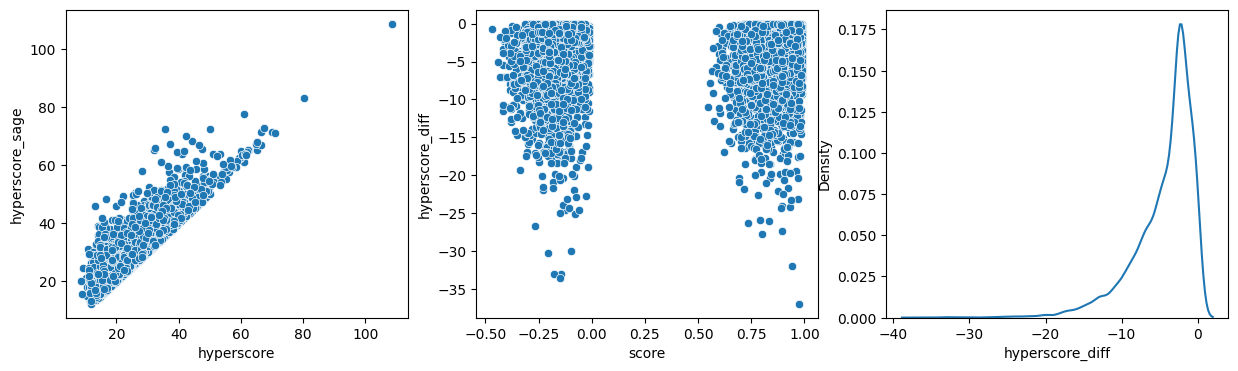

In [21]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.scatterplot(
    worse_casanovo_df,
    x="hyperscore",
    y="hyperscore_sage",
    ax=ax[0]
)
sns.scatterplot(
    worse_casanovo_df,
    y="hyperscore_diff",
    x="score",
    ax=ax[1]
)
sns.kdeplot(
    worse_casanovo_df,
    x="hyperscore_diff",
    ax=ax[2]
)

In [22]:
worse_casanovo_df[
    (worse_casanovo_df.score > .8) &
    (worse_casanovo_df.hyperscore_diff < -25)
]

,spectrum_id,peptide,score,hyperscore,hyperscore_diff,peptide_sage,hyperscore_sage
511,controllerType=0 controllerNumber=1 scan=18461,NTLTGLSTDEYTTETK,0.896624,22.022792,-27.309584,NTLTGLSSDGSYTTETK,49.332376
4130,controllerType=0 controllerNumber=1 scan=56718,EACNSVYDALPAVVEK,0.974690,35.550089,-36.892344,DAAEAVHNAVVLEEVAK,72.442433
4791,controllerType=0 controllerNumber=1 scan=63456,AAQGGVAVGTAPDLSGMEAK,0.834092,19.921499,-25.990085,AANAGGVAVSALEMAQNSGR,45.911585
6524,controllerType=0 controllerNumber=1 scan=80935,YTDESGVPVTVVTAASGTYLVGMR,0.942324,16.480942,-31.932234,YTDETGVPVTVVTAASGTYESTLK,48.413176
7968,controllerType=0 controllerNumber=1 scan=98012,KDPFLDDEVGGETAAADATQLFVEGK,0.801801,42.233107,-27.731630,MTGTVLNDDVGQATAAADATQLFVEGK,69.964736


In [36]:
def plot_mirror_spectrum(df, spectrum_id, mgf_path, engines=["Casanovo4.2.0", "sage"]):
    
    entries = df[(df.source.isin(engines)) & (df.spectrum_id==spectrum_id)]

    peptide_top = entries.loc[entries.source==engines[0], "proforma"].values[0]
    peptide_bottom = entries.loc[entries.source==engines[1], "proforma"].values[0]

    plt.figure(figsize=(15,6))

    spec_casa = plot_spectrum(
        mgf_path=mgf_path,
        spectrum_id=spectrum_id,
        peptide=peptide_top,
        plot=False
    )
    spec_sage = plot_spectrum(
        mgf_path=mgf_path,
        spectrum_id=spectrum_id,
        peptide=peptide_bottom,
        plot=False
    )

    sup.mirror(
        spec_casa, spec_sage
    )

    plt.title(
        f"TOP: {peptide_top}    ({engines[0]})\nBOTTOM: {peptide_bottom}    ({engines[1]})"
    )

In [24]:
df.loc[
    df.spectrum_id=="controllerType=0 controllerNumber=1 scan=56718",
    ["source", "proforma", "score", "hyperscore", "hyperscore_diff"]
]

,source,proforma,score,hyperscore,hyperscore_diff
24151,Casanovo4.2.0,EAC[UNIMOD:4]N[UNIMOD:7]SVYDALPAVVEK/2,0.974690,35.550089,-36.892344
65324,InstaNovo,DAAEAVHNAVVLEEVAK/2,-0.901924,72.442433,0.000000
106499,PepNet,EAC[UNIMOD:4]DSVYDALPAVVEK/2,0.787800,35.550089,-36.892344
167985,NovoB,EAC[UNIMOD:4]DSVYDALPAVVEK/2,0.459842,35.550089,-36.892344
208907,Novor,AEC[UNIMOD:4]DSVYDALPAVVEK/2,74.500000,35.550089,-36.892344
243541,PepNovo+,ALPSLPTK/1,2.306000,15.498269,-56.944164
286544,sage,DAAEAVHNAVVLEEVAK/2,0.612075,72.442433,0.000000


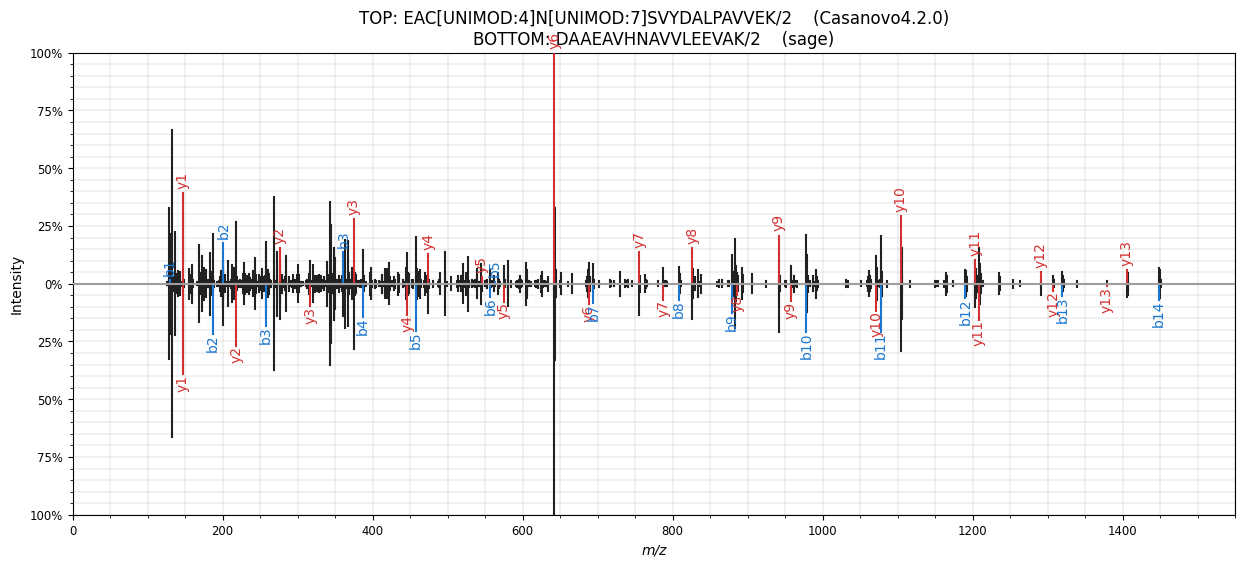

In [37]:
plot_mirror_spectrum(
    df=df,
    spectrum_id="controllerType=0 controllerNumber=1 scan=56718",
    mgf_path=mgf_path,
    engines=["Casanovo4.2.0", "sage"]
)

Nice example of a chimeric spectrum, which does not match with the database search but is not necessarly incorrect.

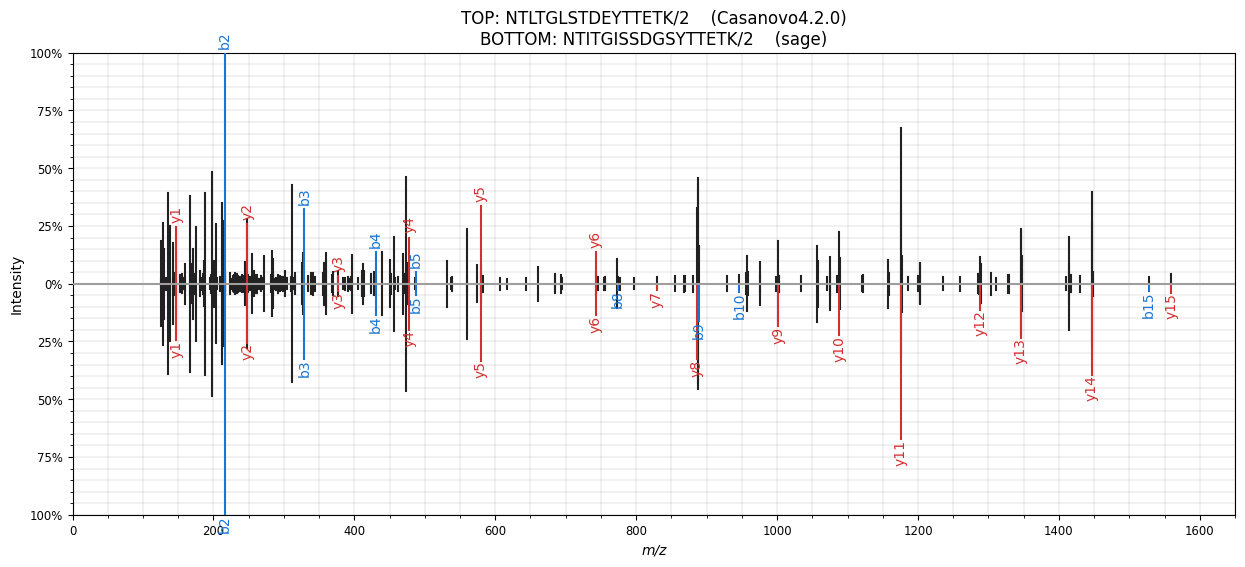

In [39]:
plot_mirror_spectrum(
    df=df,
    spectrum_id="controllerType=0 controllerNumber=1 scan=18461",
    mgf_path=mgf_path,
    engines=["Casanovo4.2.0", "sage"]
)

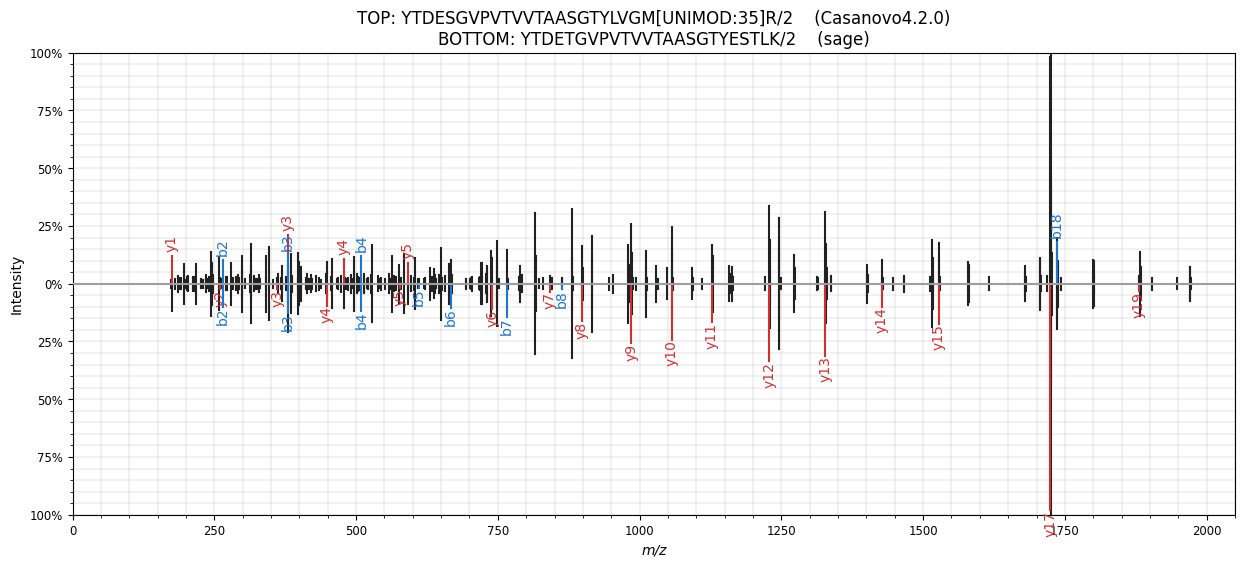

In [41]:
plot_mirror_spectrum(
    df=df,
    spectrum_id="controllerType=0 controllerNumber=1 scan=80935",
    mgf_path=mgf_path,
    engines=["Casanovo4.2.0", "sage"]
)